In [2]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Load the California dataset
dataset = fetch_california_housing(as_frame=True)

In [8]:
# A glimpse of data (X values)
dataset.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
# Target value (Y value)
dataset.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [13]:
# Check for null values
dataset.data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [17]:
# Check for null values
dataset.target.isnull().sum()

0

In [18]:
X, y = data.data, data.target

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),  # SVM for regression
    'Random Forest': RandomForestRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'XGBoost': xgb.XGBRegressor()
}


In [21]:
# Initialize lists to store MSE, RMSE, and R-squared values
mse_results = []
rmse_results = []
r2_results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)  # Computing MSE
    rmse = np.sqrt(mse)  # Computing RMSE from MSE
    r2 = r2_score(y_test, y_pred)  # Computing R-squared
    mse_results.append(mse)
    rmse_results.append(rmse)
    r2_results.append(r2)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


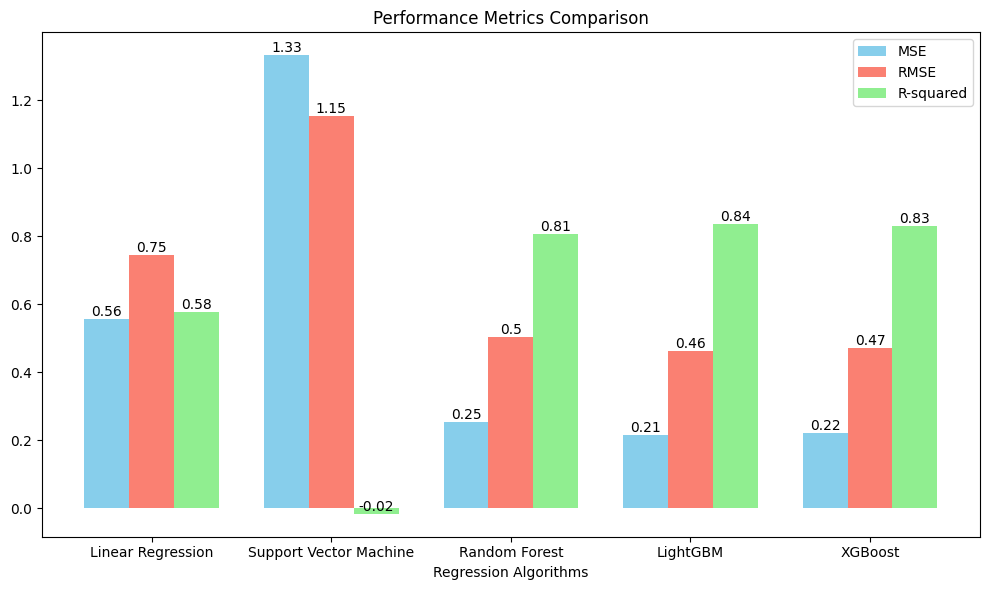

In [22]:
# Plotting MSE, RMSE, and R-squared in one chart
plt.figure(figsize=(10, 6))

barWidth = 0.25
bar1 = range(len(models))
bar2 = [x + barWidth for x in bar1]
bar3 = [x + barWidth for x in bar2]

bars = plt.bar(bar1, mse_results, color='skyblue', width=barWidth, label='MSE')
for bar, mse in zip(bars, mse_results):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(mse, 2), ha='center', va='bottom')

bars = plt.bar(bar2, rmse_results, color='salmon', width=barWidth, label='RMSE')
for bar, rmse in zip(bars, rmse_results):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(rmse, 2), ha='center', va='bottom')

bars = plt.bar(bar3, r2_results, color='lightgreen', width=barWidth, label='R-squared')
for bar, r2 in zip(bars, r2_results):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(r2, 2), ha='center', va='bottom')

plt.xlabel('Regression Algorithms')
plt.xticks([r + barWidth for r in range(len(models))], models.keys())
plt.title('Performance Metrics Comparison')
plt.legend()
plt.tight_layout()
plt.show()